In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt

In [8]:
# Load dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [10]:
# Separate features and target, dropping both 'DEATH_EVENT' and 'time' columns
X = data.drop(['DEATH_EVENT', 'time'], axis=1)
y = data['DEATH_EVENT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Build the improved neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4929 - auc: 0.5204 - loss: 0.8528 - val_accuracy: 0.6875 - val_auc: 0.4253 - val_loss: 0.7378
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5679 - auc: 0.5962 - loss: 0.7829 - val_accuracy: 0.6458 - val_auc: 0.4747 - val_loss: 0.7351
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5831 - auc: 0.5464 - loss: 0.8004 - val_accuracy: 0.6667 - val_auc: 0.5545 - val_loss: 0.7304
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5512 - auc: 0.5310 - loss: 0.7948 - val_accuracy: 0.6667 - val_auc: 0.5970 - val_loss: 0.7260
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5806 - auc: 0.5751 - loss: 0.7714 - val_accuracy: 0.6667 - val_auc: 0.6222 - val_loss: 0.7230
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5755 - auc: 0.6201 - loss: 0.7465 - val_accuracy: 0.6458 - val_auc: 0.6273 - val_loss: 0.7180
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0

In [13]:
# Evaluate the model
loss, accuracy, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

Test Accuracy: 0.7000
Test AUC: 0.6887


In [14]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.53      0.42      0.47        19

    accuracy                           0.70        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.69      0.70      0.69        60

Confusion Matrix:
[[34  7]
 [11  8]]


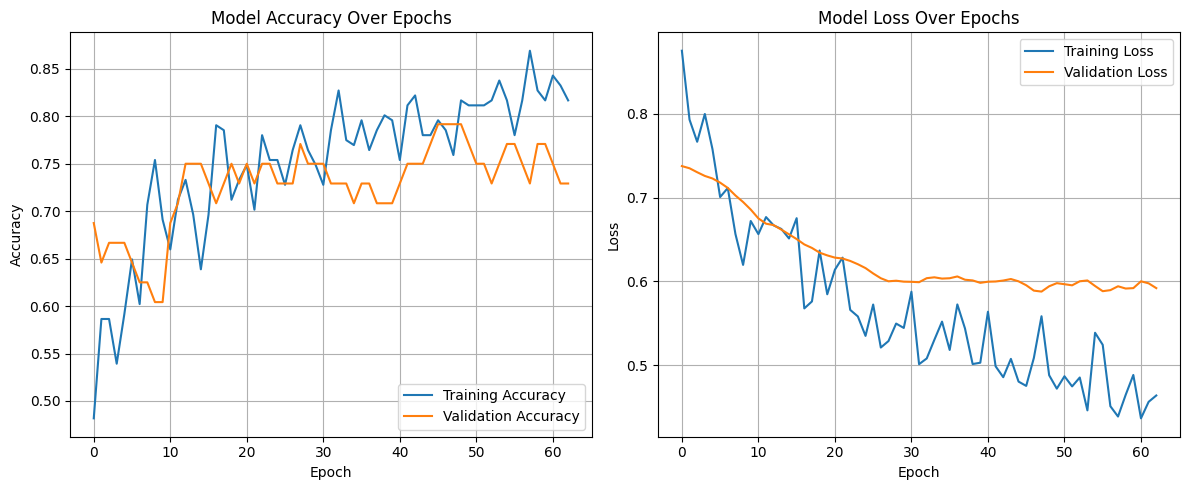

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# Save the model to an HDF5 file
model.save('heart_failure_nn_model.h5')

import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']